## Normal transformations 

- Some models assume that the data is normally distributed 

- We can transform variables to show a normal distribution 


## Examples 

- Reciprocal transformations

- Logarithmic

- Square root transformation 

- Exponential 

- Box-Cox 


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [52]:
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv("gdrive/My Drive/Colab Notebooks/FeatureEngineering/train.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [53]:
cats = ['Age', 'Fare', 'Survived']

In [54]:
data = data[cats]
data.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [55]:
sns.set()
def distro(data, columns):
  import scipy.stats as stats
  for col in columns:
    fig, ax = plt.subplots(1,2, figsize=(15,6))
    stats.probplot(data[col].dropna(), dist="norm", plot=ax[0])
    ax[0].set_title("QQPlot")
    sns.distplot(data[col], ax=ax[1])
    ax[1].set_title("Distribution")


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['Age', 'Fare']].fillna(data.mean()),
                                                    data['Survived'], test_size=0.2)
X_train.shape, X_test.shape

((712, 2), (179, 2))

In [57]:
cols = cats[:-1]

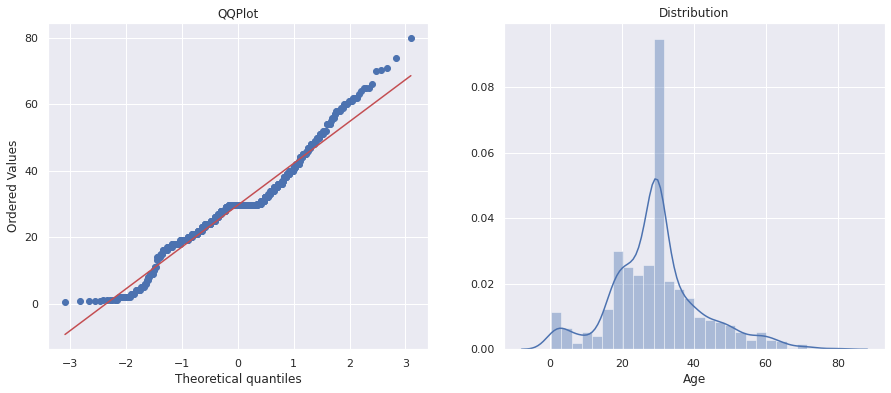

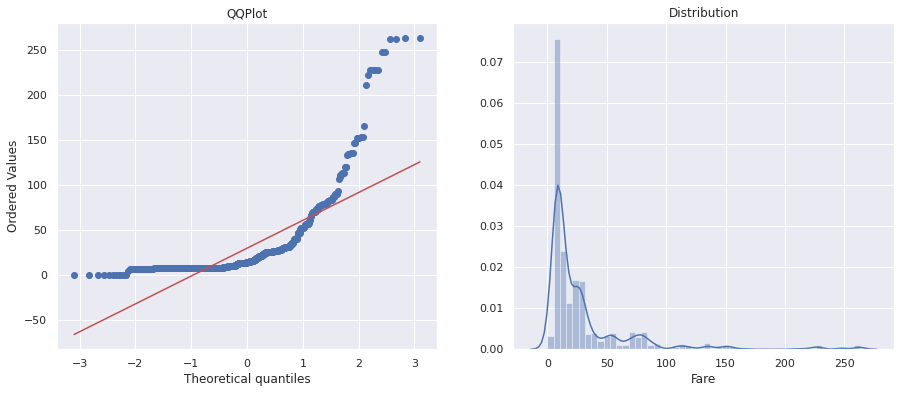

In [58]:
distro(X_train, cols)

In [59]:
def log_transform(X_train, X_test, cols):
  for col in cols:
    X_train[col] = np.log(X_train[col])
    X_test[col] = np.log(X_train[col])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


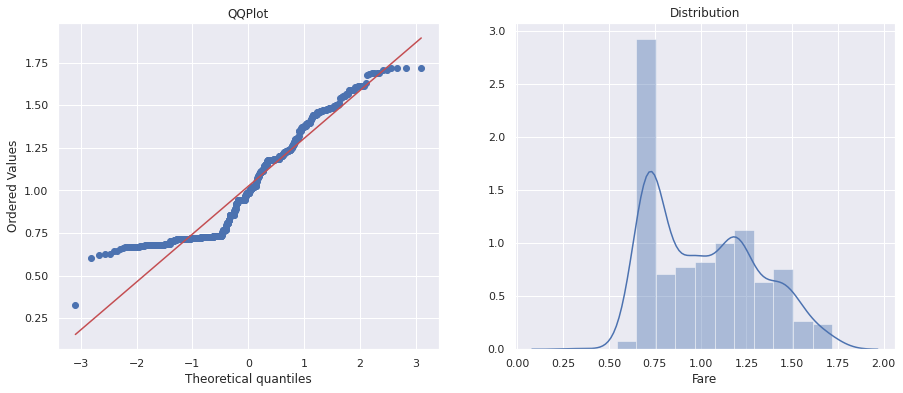

In [61]:
log_transform(X_train, X_test, ['Fare'])
X_train = X_train.fillna(X_train.mean())
distro(X_train, ['Fare'])